In [24]:
import numpy as np
from scipy.io import loadmat
import pandas as pd
tmp=loadmat(r'C:\Users\vishw\Downloads\dataset.mat',struct_as_record=True)

In [6]:
#    load data from the file
xdata=np.array(tmp['EEGsample'])
label=np.array(tmp['substate'])
subIdx=np.array(tmp['subindex'])

label.astype(int)
subIdx.astype(int)
    
samplenum=label.shape[0]
    
#   there are 11 subjects in the dataset. Each sample is 3-seconds data from 30 channels with sampling rate of 128Hz. 
channelnum=30
subjnum=11
samplelength=3
sf=128

#   ydata contains the label of samples   
ydata=np.zeros(samplenum,dtype=np.longlong)
    
for i in range(samplenum):
    ydata[i]=label[i]


C:\Users\vishw\AppData\Local\Temp\ipykernel_10912\1363336063.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ydata[i]=label[i]


In [7]:
import mne

In [8]:
channel_names=['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT7', 'FC3', 'FCZ', 'FC4', 'FT8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'TP7', 'CP3', 'CPz', 'CP4', 'TP8','T5', 'P3', 'PZ', 'P4', 'T6', 'O1', 'Oz','O2']

In [9]:
#initialize an info structure
info=mne.create_info(
    ch_names=channel_names,
    ch_types=['eeg']*channelnum,
    sfreq=sf)
print('Event created:',info)

Event created: <Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FT7, FC3, FCZ, FC4, FT8, T3, C3, ...
 chs: 30 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 30
 projs: []
 sfreq: 128.0 Hz
>


In [10]:
raw=mne.io.RawArray(xdata[0],info)

Creating RawArray with float64 data, n_channels=30, n_times=384
    Range : 0 ... 383 =      0.000 ...     2.992 secs
Ready.


Using matplotlib as 2D backend.


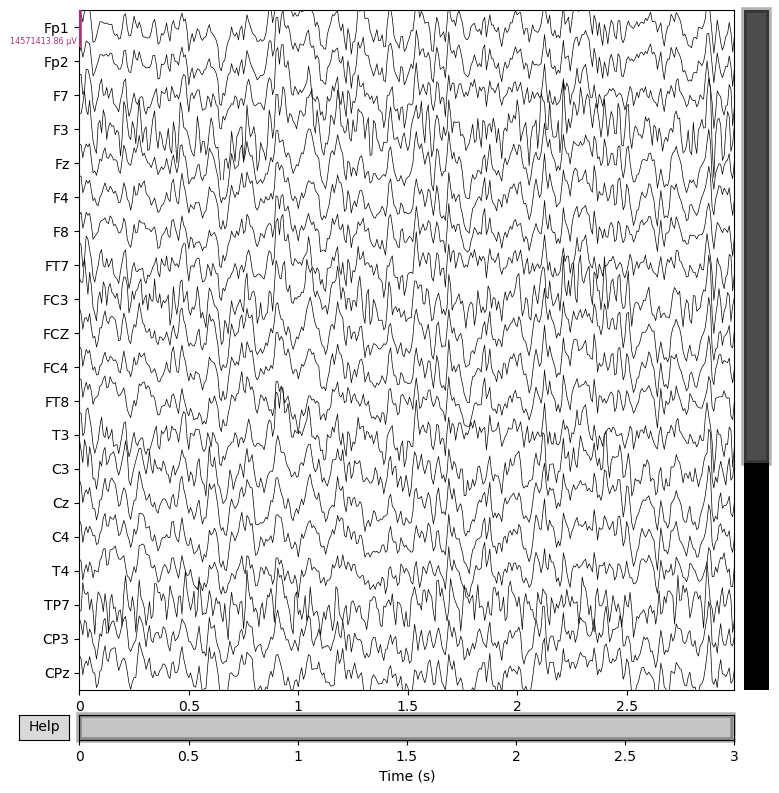

In [11]:
raw.plot(scalings='auto');

## Creating Events

In [12]:
#creating event id, 1 for drowsy and 0 for alert
event_id=dict(alert=0,drowsy=1)

In [14]:
tmp["substate"].shape

(2022, 1)

In [17]:
# Create an event matrix: events with alternating event codes
eventLength = tmp["substate"].shape[0]
Y = tmp["substate"].flatten()
ev = [i*sf*3 for i in range(eventLength)]

events = np.column_stack((np.array(ev,  dtype = int),
                          np.zeros(eventLength,  dtype = int),
                          np.array(Y,  dtype = int)))

## Epochs

In [40]:
#The time window(in samples) to extract for each trial
tmin=0.5

#create the :class: mne.EpochsArray object
epochs=mne.EpochsArray(xdata,info,events,tmin,event_id)

# # Convert the dictionary to a Pandas DataFrame

# subindex = tmp['subindex'].flatten()  
# substate = tmp['substate'].flatten() 
# metadata_df = pd.DataFrame({'subject': subindex, 'state': substate})

# # Assign the DataFrame to the metadata attribute
# epochs.metadata = metadata_df

Not setting metadata
2022 matching events found
No baseline correction applied
0 projection items activated


In [41]:
events

array([[     0,      0,      0],
       [   384,      0,      0],
       [   768,      0,      0],
       ...,
       [775296,      0,      1],
       [775680,      0,      1],
       [776064,      0,      1]])

## Visualization

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs...


C:\Users\vishw\AppData\Local\Temp\ipykernel_10912\3011794035.py:2: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs.plot_psd()
C:\Users\vishw\AppData\Local\Temp\ipykernel_10912\3011794035.py:2: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.plot_psd()
C:\Users\vishw\anaconda3\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


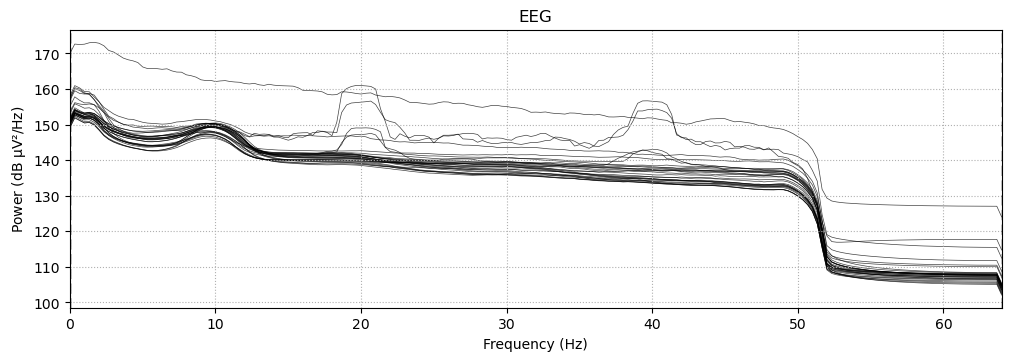

In [42]:
#plotting the psd curve
epochs.plot_psd()

Not setting metadata
2022 matching events found
No baseline correction applied
0 projection items activated
combining channels using GFP (eeg channels)


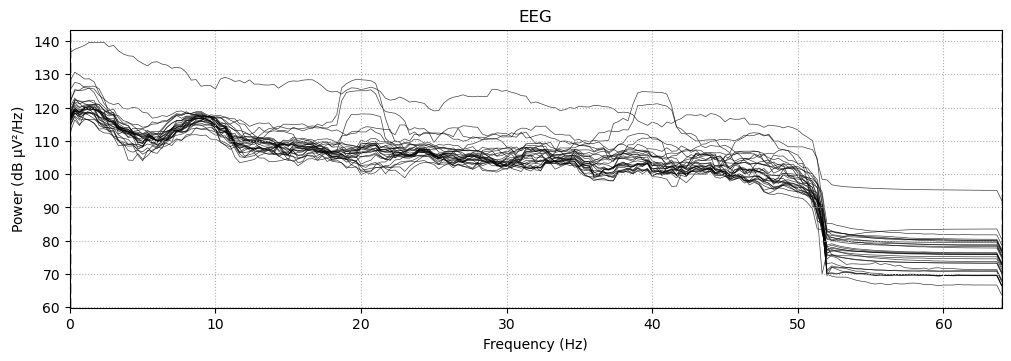

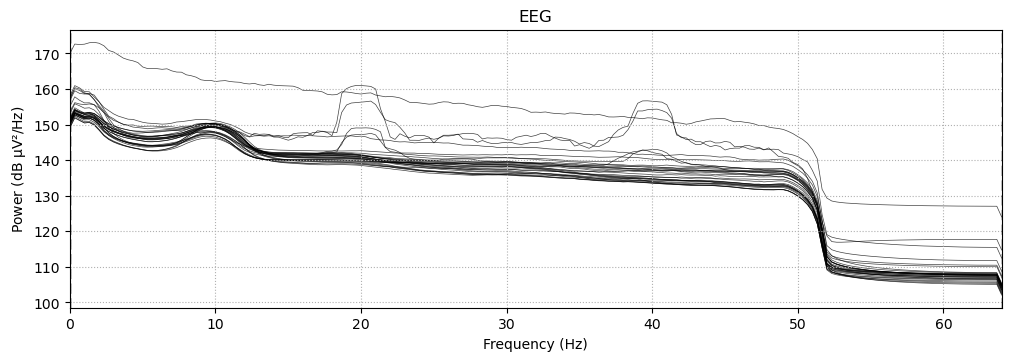

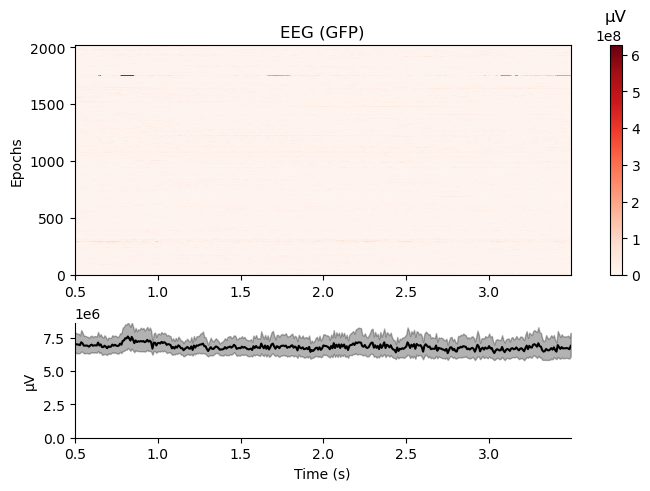

In [43]:
epochs.plot_image();

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


C:\Users\vishw\AppData\Local\Temp\ipykernel_10912\3404087069.py:1: FutureWarning: The value of `amplitude='auto'` will be removed in MNE 1.8.0, and the new default will be `amplitude=False`.
  epochs.average().plot_psd()
C:\Users\vishw\AppData\Local\Temp\ipykernel_10912\3404087069.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  epochs.average().plot_psd()
C:\Users\vishw\anaconda3\Lib\site-packages\mne\viz\utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


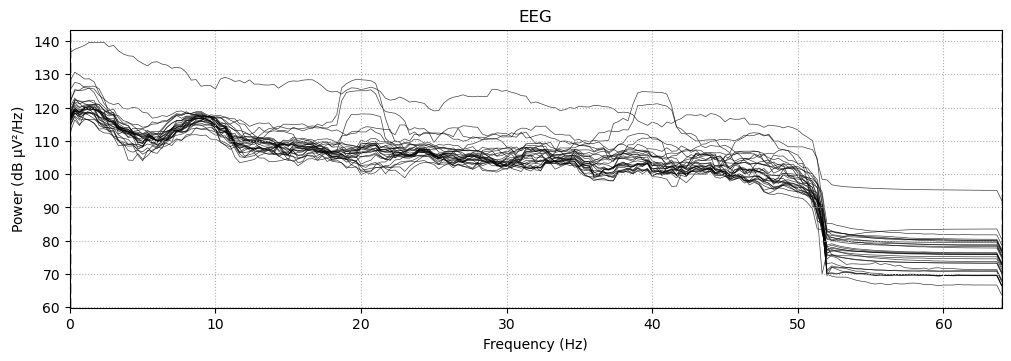

In [44]:
epochs.average().plot_psd()

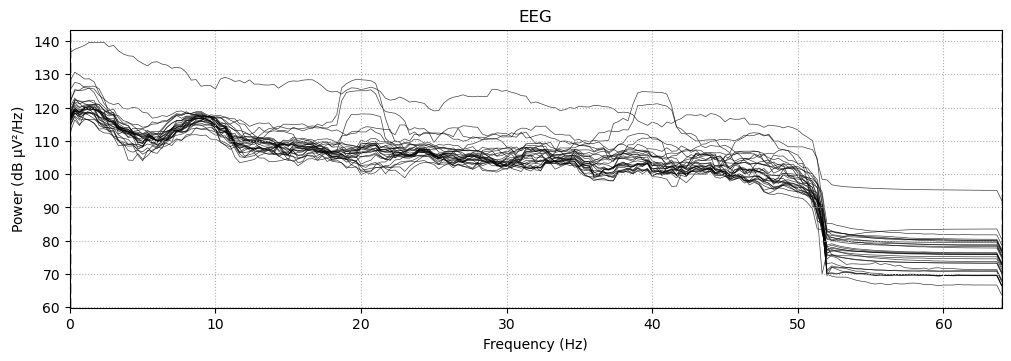

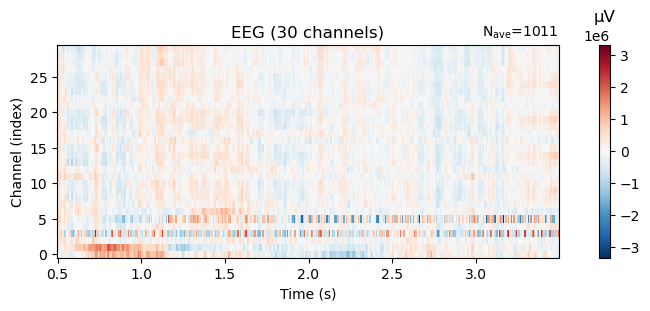

In [45]:
epochs["alert"].average().plot_image();